<a href="https://colab.research.google.com/github/jbuzzio/DeepLearning/blob/main/02_preprocesado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gdown

# Descarga y descompresion del dataset que se encuentra en google drive

In [ ]:
file_id = "1LjpdAiNaD-C67WNswE5pE-6MNEh4LtKj"  # Reemplaza FILE_ID con el ID de tu archivo
destination = "cicddos2019_dataset.zip"

# Descargar el archivo
!gdown --id "$file_id" -O "$destination"

# Descomprimir el archivo
!unzip -q "$destination" -d "/content"
!rm cicddos2019_dataset.zip

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1LjpdAiNaD-C67WNswE5pE-6MNEh4LtKj
From (redirected): https://drive.google.com/uc?id=1LjpdAiNaD-C67WNswE5pE-6MNEh4LtKj&confirm=t&uuid=dc759c34-5c13-4498-958b-44cf3411f638
To: /content/cicddos2019_dataset.zip
100% 168M/168M [00:01<00:00, 167MB/s]


In [26]:
import os
import numpy as np
import sklearn.preprocessing as skpp
import pandas as pd
import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.utils import resample

# Cargar el dataset


In [10]:
dataset = np.load("/content/cicddos2019_dataset.npz")
X = dataset['X']
y = dataset['y']

In [20]:
labels = pd.DataFrame(y, columns=['label'])
labels['label'].unique()

array(['DrDoS_DNS', 'DrDoS_LDAP', 'DrDoS_MSSQL', 'DrDoS_NetBIOS',
       'DrDoS_NTP', 'DrDoS_SNMP', 'DrDoS_SSDP', 'DrDoS_UDP', 'Normal',
       'Syn', 'UDPLag'], dtype=object)

# Submuestro de los datos

Dado que en el notebook anterior vimos que los datos estan muy desbalanceados. Es necesario que hagamos un balanceo de los datos a fin de evitar algun sesgo para con las clases mayoritarias al momento de la clasificación.

In [25]:
# Suponiendo que tienes un dataframe con las columnas 'data' (imágenes) y 'label' (clase)
balanced_data = []
min_class_size = labels['label'].value_counts().min()
min_class_size

174

In [22]:
# Realizar el submuestreo por clase
for label in labels['label'].unique():
    # Filtrar las imágenes y etiquetas correspondientes a la clase
    class_indices = labels[labels['label'] == label].index    #Obtiene todos los indices de las etiquetas asociada a cada clase
    class_images = X[class_indices] #Obtiene las imagenes asociadas a los indices
    class_labels = labels.loc[class_indices] #Obtiene las etiquetas asociadas a los indices y sus correspondientes imagenes

    # Submuestrear la clase
    balanced_images, balanced_labels = resample(class_images, class_labels, replace=False, n_samples=min_class_size, random_state=42)

    # Añadir los datos balanceados a la lista
    balanced_data.append((balanced_images, balanced_labels))

# Concatenar todas las clases balanceadas
balanced_images = np.concatenate([data[0] for data in balanced_data], axis=0)
balanced_labels = pd.concat([data[1] for data in balanced_data], axis=0)

# Mostrar la forma de las imágenes balanceadas y las etiquetas
print(f'Imágenes balanceadas: {balanced_images.shape}')
print(f'Etiquetas balanceadas: {balanced_labels.shape}')

Imágenes balanceadas: (1914, 60, 60, 3)
Etiquetas balanceadas: (1914, 1)


Ploteamos nuevamente las clases

In [23]:
distribucion_clases= {}
for i in labels['label'].unique():
  distribucion_clases[i] =len(balanced_labels[balanced_labels['label'] == i])

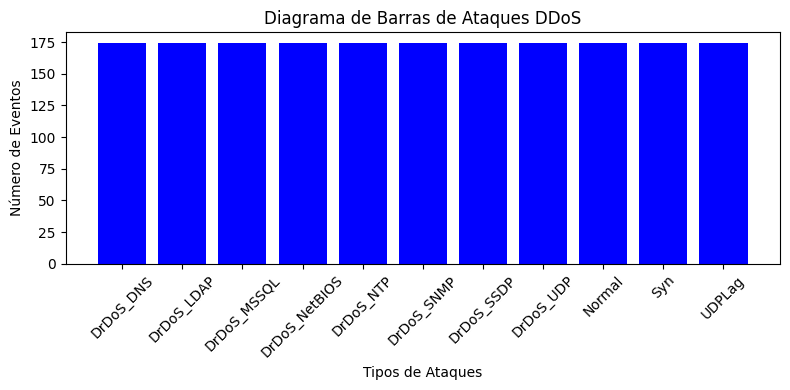

In [24]:
plt.figure(figsize=(8, 4))
plt.bar(distribucion_clases.keys(),distribucion_clases.values(), color='blue')
plt.title('Diagrama de Barras de Ataques DDoS')
plt.xlabel('Tipos de Ataques')
plt.ylabel('Número de Eventos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Guardamos este dataset submuestrado para utilizarlo en la arquitectura

In [32]:
np.savez("/content/cicddos2019_comprimido", X=balanced_images, y=balanced_labels)
print("Dataset guardado como archivo comprimido.")

Dataset guardado como archivo comprimido.
